# Project: Movie Dataset - [TMDB]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
columns=['id:Not Important',
'imdb_id:Not Important',
'popularity:Important',
'budget:Important',
'revenue:Important',
'original_title:Important',
'cast:Important',
'homepage:Not Important',
'director:Important',
'tagline:Not Important',
'overview:Not Important',
'runtime:Important',
'genres:Important',
'production_companies:Important',
'release_date:Not Important',
'vote_count:Important',
'vote_average:Important',
'release_year:Important',
'budget_adj:Not Important',
'revenue_adj:Not Important']


## Questions
### What's The Most Popular Movies?
### What's The Top Rating Movies?
### What's The Top Revenue Movies?
### Which Rate Most Movies Has?
### What's The Most Genre Of The Movies?
### How The Revenue Changes Cross The Years?
### What's The Relation Between Revenue and Votes?
### What's The Relation Between Votes and Popularity?
### What's The Relation Between Revenue and Budget?
### What's The Relation Between Revenue and Genres?

In [1]:
#import important  libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
df=pd.read_csv('tmdb-movies.csv')

### General Properties

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
df.duplicated().sum()

1


# Data Cleaning

### Drop Duplicates:

In [9]:
df.drop_duplicates(inplace=True)

### Drop Columns That Won't Be Analysed

In [10]:
df.drop(['homepage','id','imdb_id','tagline','keywords','release_date'],axis=1,inplace=True)

In [11]:
df.shape

(10865, 15)

### Reorder The Columns

In [12]:
df = df.reindex(["original_title","director","cast","production_companies","genres","popularity","release_year","budget","revenue","vote_count","vote_average","runtime","budget_adj","revenue_adj"], axis=1)

In [13]:
df.head()

,original_title,director,cast,production_companies,genres,popularity,release_year,budget,revenue,vote_count,vote_average,runtime,budget_adj,revenue_adj
0,Jurassic World,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Universal Studios|Amblin Entertainment|Legenda...,Action|Adventure|Science Fiction|Thriller,32.985763,2015,150000000,1513528810,5562,6.5,124,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,George Miller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Village Roadshow Pictures|Kennedy Miller Produ...,Action|Adventure|Science Fiction|Thriller,28.419936,2015,150000000,378436354,6185,7.1,120,1.379999e+08,3.481613e+08
2,Insurgent,Robert Schwentke,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Summit Entertainment|Mandeville Films|Red Wago...,Adventure|Science Fiction|Thriller,13.112507,2015,110000000,295238201,2480,6.3,119,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,J.J. Abrams,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Lucasfilm|Truenorth Productions|Bad Robot,Action|Adventure|Science Fiction|Fantasy,11.173104,2015,200000000,2068178225,5292,7.5,136,1.839999e+08,1.902723e+09
4,Furious 7,James Wan,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Universal Pictures|Original Film|Media Rights ...,Action|Crime|Thriller,9.335014,2015,190000000,1506249360,2947,7.3,137,1.747999e+08,1.385749e+09


In [14]:
def scatter_chart(x_name,y_name):
    df.plot(x=x_name,y=y_name,kind='scatter',figsize=(10,5),title=f'Relation Between {x_name} and {y_name}')

# Exploratory Data Analysis

### What's The Most Popular Movies?

In [15]:
highest_tmdb_popularity= df.sort_values('popularity', ascending = False)
high_popularity = highest_tmdb_popularity.loc[:,['original_title','popularity','revenue','director','genres','vote_average','vote_count','budget', 'release_year','runtime']]
high_popularity.head(10)

,original_title,popularity,revenue,director,genres,vote_average,vote_count,budget,release_year,runtime
0,Jurassic World,32.985763,1513528810,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6.5,5562,150000000,2015,124
1,Mad Max: Fury Road,28.419936,378436354,George Miller,Action|Adventure|Science Fiction|Thriller,7.1,6185,150000000,2015,120
629,Interstellar,24.949134,621752480,Christopher Nolan,Adventure|Drama|Science Fiction,8.0,6498,165000000,2014,169
630,Guardians of the Galaxy,14.311205,773312399,James Gunn,Action|Science Fiction|Adventure,7.9,5612,170000000,2014,121
2,Insurgent,13.112507,295238201,Robert Schwentke,Adventure|Science Fiction|Thriller,6.3,2480,110000000,2015,119
631,Captain America: The Winter Soldier,12.971027,714766572,Joe Russo|Anthony Russo,Action|Adventure|Science Fiction,7.6,3848,170000000,2014,136
1329,Star Wars,12.037933,775398007,George Lucas,Adventure|Action|Science Fiction,7.9,4428,11000000,1977,121
632,John Wick,11.422751,78739897,Chad Stahelski|David Leitch,Action|Thriller,7.0,2712,20000000,2014,101
3,Star Wars: The Force Awakens,11.173104,2068178225,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,7.5,5292,200000000,2015,136
633,The Hunger Games: Mockingjay - Part 1,10.739009,752100229,Francis Lawrence,Science Fiction|Adventure|Thriller,6.6,3590,125000000,2014,123


The Most Popular Movies is Action Movies 

### What's The Top Rating Movies?

In [16]:
highest_imdb = df.sort_values('vote_average', ascending = False)
high = highest_imdb.loc[:,['original_title', 'vote_average','director','genres','release_year','budget', 'runtime']]
high.head(10)

,original_title,vote_average,director,genres,release_year,budget,runtime
3894,The Story of Film: An Odyssey,9.2,Mark Cousins,Documentary,2011,0,900
538,The Mask You Live In,8.9,Jennifer Siebel Newsom,Documentary,2015,0,88
1200,Black Mirror: White Christmas,8.8,Carl Tibbetts,Drama|Horror|Mystery|Science Fiction|Thriller,2014,0,74
2269,Life Cycles,8.8,Derek Frankowski,Documentary,2010,0,47
6911,Pink Floyd: Pulse,8.7,David Mallet,Music,2006,0,145
2401,Opeth: In Live Concert At The Royal Albert Hall,8.6,NaN,Music,2010,0,163
3690,The Art of Flight,8.5,Curt Morgan,Adventure|Documentary,2011,0,80
8411,Queen - Rock Montreal,8.5,Saul Swimmer,Music,1981,0,138
8221,A Personal Journey with Martin Scorsese Throug...,8.5,Martin Scorsese|Michael Henry Wilson,Documentary,1995,0,225
8839,Dave Chappelle: Killin' Them Softly,8.5,Stan Lathan,Comedy,2000,0,57


The Most High Rating Movies is Documentary Movies

## What's The Top Revenue Movies?

In [17]:
highest_tmdb_revenue= df.sort_values('revenue', ascending = False)
high_revenue = highest_tmdb_revenue.loc[:,['original_title','revenue','director','genres','vote_average','budget', 'release_year','runtime']]
high_revenue.head(10)

,original_title,revenue,director,genres,vote_average,budget,release_year,runtime
1386,Avatar,2781505847,James Cameron,Action|Adventure|Fantasy|Science Fiction,7.1,237000000,2009,162
3,Star Wars: The Force Awakens,2068178225,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,7.5,200000000,2015,136
5231,Titanic,1845034188,James Cameron,Drama|Romance|Thriller,7.3,200000000,1997,194
4361,The Avengers,1519557910,Joss Whedon,Science Fiction|Action|Adventure,7.3,220000000,2012,143
0,Jurassic World,1513528810,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6.5,150000000,2015,124
4,Furious 7,1506249360,James Wan,Action|Crime|Thriller,7.3,190000000,2015,137
14,Avengers: Age of Ultron,1405035767,Joss Whedon,Action|Adventure|Science Fiction,7.4,280000000,2015,141
3374,Harry Potter and the Deathly Hallows: Part 2,1327817822,David Yates,Adventure|Family|Fantasy,7.7,125000000,2011,130
5422,Frozen,1274219009,Chris Buck|Jennifer Lee,Animation|Adventure|Family,7.5,150000000,2013,102
5425,Iron Man 3,1215439994,Shane Black,Action|Adventure|Science Fiction,6.9,200000000,2013,130


in top 10 movies the most genre has revenue is action movies but in genral comedy movies makes more revenue

### Which Rate Most Movies Has?

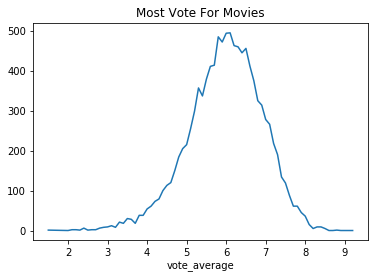

In [18]:
data_groupby_ratings = df.groupby(['vote_average'])['original_title'].count()
data_groupby_ratings.plot(title='Most Vote For Movies');

Most Movies Has Rating  between 4 and 8

### What's The Most Genre Of The Movies?

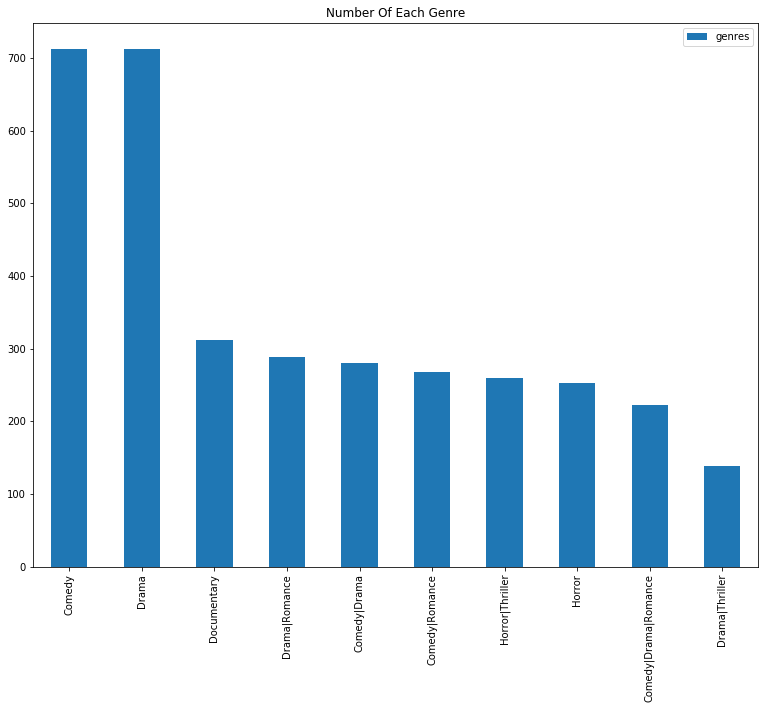

In [19]:
genres=pd.DataFrame(df['genres'].value_counts())
genres.head(10).plot(kind='bar',figsize=(13,10),title='Number Of Each Genre');

The Comedy Movies and Drama Movies The most made Movies

<a id='conclusions'></a>
# Conclusions
## Results
### my analsis find that:
1-The Most Movies Has Big Revenue is Comedy Movies 
2-The Most Popular Movies is Action Movies 
3-The Most High Rating Movies is Documentary Movies
4-Most Movies Has Rating  between 4 and 8
5-The Movies Which Has Big Budget Get Big Revenue 
6-Movies Industry Is going Bigger over The Years 
7-The Movies Which Has High Ratings Get Big Revenue
## limitations:
1-Most of Variables is Categorical,Which Doesn't Allow Me For High Level Of Statistics
2-Most Statistics Used Here Is Descriptive Not Inferential

# How The Revenue Changes Over The Years?


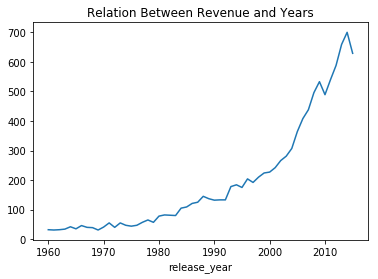

In [28]:
data_groupby_revenue = df.groupby(['release_year'])['revenue'].count()
data_groupby_revenue.plot(title='Relation Between Revenue and Years');

## Movies Industry Is going Bigger over The Years 

# What's The Relation Between Revenue and Votes?

In [ ]:
scatter_chart('vote_average','revenue')


## The Movies Which Has High Ratings Get Big Revenue

# What's The Relation Between Votes and Popularity?

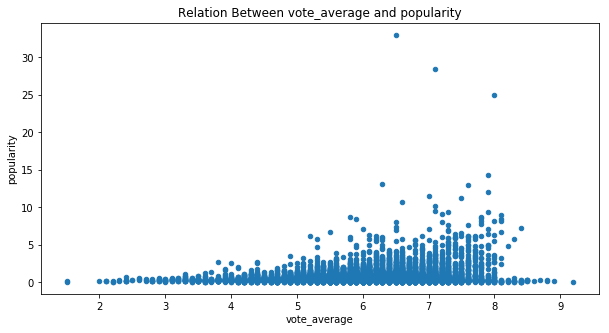

In [22]:
scatter_chart('vote_average','popularity')

## Movies Has High Rating is Popular Than another

# What's The Relation Between Revenue and Budget?


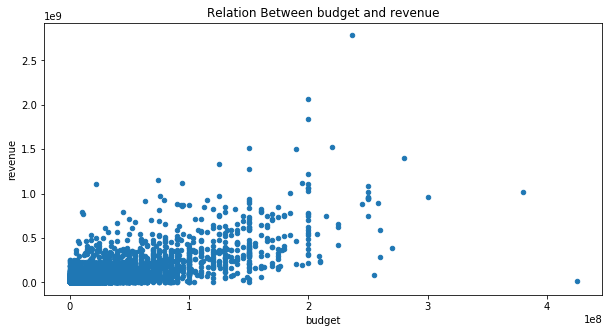

In [21]:
scatter_chart('budget','revenue')

## The Movies Which Has Big Budget Get Big Revenue 

# What's The Relation Between Revenue and  Genres?

In [23]:
df.groupby('genres')['revenue'].sum().sort_values(ascending=False)

genres
Comedy                                                 20323889661
Drama                                                  15107533347
Comedy|Romance                                         11545724341
Adventure|Fantasy|Action                                7597483556
Comedy|Drama|Romance                                    7251175696
Drama|Romance                                           6798112125
Animation|Family                                        6701726154
Action|Adventure|Science Fiction                        6420484308
Adventure|Fantasy|Family                                6079516484
Adventure|Action|Science Fiction                        5256276988
Adventure|Action|Thriller                               5208443468
Action|Thriller                                         4942991441
Action|Adventure|Fantasy|Science Fiction                4928441131
Comedy|Drama                                            4851894696
Animation|Comedy|Family                                

### depends on the analysis below , it's clear that comedy movies are the most genres has revenue.

### Top 10 Genres Has Revenue

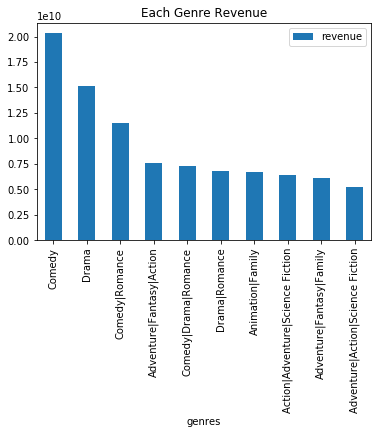

In [32]:
genres_revenue=pd.DataFrame(df.groupby('genres')['revenue'].sum().sort_values(ascending=False).head(10))
genres_revenue.plot(title='Each Genre Revenue',kind='bar');

## The Most Movies Has Big Revenue is Comedy Movies

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0